In [0]:
# 일반적으로 머신러닝은 데이터가공/변환 (전처리)  -> 모델학습/예측 -> 평가 의 과정을 거침

# 앞의 타이타닉 예제에서 모델의 평가는 정확도만 사용했음. 한편, 머신러닝의 예측성능의 평가방법은 다양함

# 회귀 - R^2, MSE평균제곱오차
# 분류 - 혼동행렬, 크로스엔트로피, 최대우도, ROU, ARC, F1 스코어

# 정확도accuracy
# 맞는 것을 맞다고 틀린 것을 틀리다고 올바르게 예측하는 것
# TP + TN / (TP + FN + FP + TN)
# 혼동행렬 대각선 부분


# 정밀도precision
# 모델의 예측값이 얼마나 정확하게 맞게 예측되었는지 알아봄
# TP / (TP + FP)
# 혼동행렬 1열 부분

# 민감도sensitivity
# 맞는 것 중 맞다고 예측된 것들의 비율 = 재현율

# 특이도specificity
# 틀린 것 중 틀리다고 예측된 것들의 비율
# (FP) / (TN + FP)
# 혼동 행렬의 2행 부분

# 정확도 지표만으로는 ML 모델의 성능을 파악하기에는 다소 문제가 있음 - 왜곡의 위험

# 즉, 탐색적 분석을 시행했을 때 성별을 기준으로 생존비율은 여성일 때가 더 높았음.
# 따라서 굳이 ML 알고리즘을 적용하지 않아도 성별이 여성일 경우 생존, 남성일 경우 사망이라고 예측해도 크게 무리 없음



In [0]:
# 다양한 머신러닝 알고리즘을 이용.
# 교차검증 방식으로 모델을 훈련시키고 예측 정확도를 평가해 줌

import sklearn
import image
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.datasets import load_digits

# predictive modeling 계열 (의사결정나무, 랜덤포레스트, 로지스틱 회귀, Knearest 등) <- Kmeans 어따 빼먹음
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 모델 검증 관련 (정확도)
from sklearn.metrics import accuracy_score

# preprocessing (전처리) 그룹
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import LabelEncoder



# pandas 출력 설정 : 출력시 가로 생략 없애기
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width',250)
pd.set_option('display.expand_frame_repr', False) 
# 바로 위 1줄이면 그 위위 2줄과 동일

from sklearn.base import BaseEstimator

from sklearn.metrics import confusion_matrix # 혼동행렬

# score류 (predictive modeling을 평가하는 지표)
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 민감도(재현율)
from  sklearn.metrics import f1_score # F1 스코어 (정밀도, 민감도 조화평균..)
from sklearn.metrics import roc_auc_score

# ROC

# Receiver Operation Characteristics Curve
# 수신자 판단 곡선

# 세계 2차 대전 통신 장비 성능 평가를 위해 고안된 수치
# 의학분야에 많이 사용되지만, 머신러닝의 이진 분류 모델 예측 성능 평가에도 사용

# 특이도(FPR)가 변할 때 민감도가 어떻게 변하는지 알아보기 위한 곡선

# 환자 중 보균자p/정상인n 있는 경우
# 재현율 : 보균자를 보균자로 양성 판정
# 특이도 : 정상인을 정상인으로 음성 판정

# -_-;;; -------------------------------------------------------------------------------


# AUC 

# Area Under Curve
# ROC 곡선 밑의 면적을 구한 값
# 1에 가까울수록 좋은 수치를 의미함

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# BaseEstimator 클래스를 상속받아
# 성별이 남성이면 사망, 여성이면 생존이라고 예측하는데 
# 더미분류기를 하나 생성

from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # 아무것도 학습하지 않는 fit 메서드 정의
  def fit(self, X, y=None):
    pass
  
  # 성별이 1(남성)이면 0(사망), 0(여성)이면 1(생존)
  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    # 입력데이터 크기만큼 0으로 채워진 1차원 행렬 생성
    
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] != 1:
        pred[i] = 1
      # 성별이 여성인 경우 1로 설정  
        
    return pred


# 이렇게 만들어진 분류기를 타이타닉 데이터에 적용
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 원본데이터 로딩 및 전처리
titanic = pd.read_csv('titanic.csv')
titanic_target = titanic['Survived']
titanic_data = titanic.drop('Survived', axis=1)


# 데이터 전처리
from sklearn.preprocessing import LabelEncoder


# null 처리
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('N', inplace=True)
titanic['Embarked'].fillna('N', inplace=True)
titanic['Fare'].fillna(0, inplace=True)


# 불필요한 속성 제거
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


# 레이블 인코딩 적용
titanic['Cabin'] = titanic['Cabin'].str[:1]
# 선실 위치의 첫글자를 추출(deck 단위)

#print(titanic['Cabin'])

features = ['Cabin', 'Sex', 'Embarked']
for feature in features:
  #print(feature)
  le = LabelEncoder()
  le = le.fit(titanic[feature])
  titanic[feature] = le.transform(titanic[feature])
  #print(titanic[feature])

titanic_target = titanic['Survived']
titanic_data = titanic.drop('Survived', axis=1)


X_train, X_test, y_train, y_test = \
train_test_split(titanic_data, titanic_target, test_size=0.2, random_state=0)



# 가짜 분류기에 데이터 적용
my_clf = MyDummyClassifier()

my_clf.fit(X_train, y_train)

mypred = my_clf.predict(X_test)
print('정확도', accuracy_score(y_test, mypred))
# 0.7877

# 즉, 이렇게 단순한 알고리즘만으로 예측하더라도 
# 데이터의 구성에 따라 정확도가 약 78.77%가 나옴
# 불균형한 레이블의 비율에서는 정확도 지표로 
# 모델 성능을 평가하는 것은 올바르지 않음
titanic_data['Sex'].value_counts()
titanic_target.value_counts()


# 예를 들어 100개의 종속변수 중 90개가 0이고
# 10개가 1인 경우 무조건 0으로 예측결과를 반환하는 
# 머신러닝 알고리즘의 정확도는 90% 임!!

정확도 0.7877094972067039


0    549
1    342
Name: Survived, dtype: int64

In [0]:
# MINST 데이터셋을 변환해서 불균형한 데이터셋으로 만든 후,
# 정확도 지표사용시 어떤 문제가 발생하는지 알아봄

from sklearn.base import BaseEstimator

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y_None):
    pass
  
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)
    # 입력값 X에 대해 데이터 크기만큼 
    # 0으로 채운 행렬을 만들어 결과로 리턴 
    # 즉, 입력값에 상관없이 무조건 0을 반환

    # pred = np.zeros((X.shape[0], 1))
    # 입력데이터 크기만큼 0으로 채워진 1차원 행렬 생성

from sklearn.datasets import load_digits

digits = load_digits()
#print(digits)
#print('-------------')

y = (digits.target == 7).astype(int)
# digit 이 7인 데이터만 골라서 1로 변환해서 target(종속변수)으로 지정

#print(y)
#print('-------------')

X_train, X_test, y_train, y_test = \
train_test_split(digits.data, y, random_state=11)


# 데이터 분포 확인
print('레이블(종속변수) 크기', y_test.shape)
print('-------------')
print('레이블 분포', pd.Series(y_test).value_counts())
print('-------------')
# 0 405
# 1 45

print(y_test)
print(pd.Series(y_test))

my_clf = MyFakeClassifier()
my_clf.fit(X_train, y_train)
mypred = my_clf.predict(X_test)
print('정확도', accuracy_score(y_test, mypred))


# 0.900
# 예측을 0으로만 했는데도 정확도 90% 달성!!
# => 실제 예측범위는 0 ~ 9 사이!!

# 예를 들어, 선생님이 시험 정답지의 답을 1로만 작성하는 경우,
# 학생이 1로 찍기만 해도 100점을 맞는 경우와 비슷한 상황임!

레이블(종속변수) 크기 (450,)
-------------
레이블 분포 0    405
1     45
dtype: int64
-------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [0]:
# 따라서 정확도 평가 지표는 불균형한 레이블 데이터셋에서의 성능수치로 사용되면 안됨
# => 이러한 한계를 극복하기 위해 혼동행렬 사용
# => 특히 정확도보다는 정밀도, 정밀도 보다는 민감도

In [0]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix(y_test, mypred)

#                   negative   positive(prediction)
# (actual) negative  [405,        0]
#         positive  [45,         0]
  
  
# 정확도
# (TN + TP) / (TN + TP + FN + FP)
# = (405 + 0) / (405 + 0 + 45 + 0) = 0.9

# 정밀도 (positive 예측여부 : 양성 예측도)

# 재현율(정답여부 : 민감도) -_-;; 모르겠고


# Thus in binary classification,
# the count of true negatives is C0, 0,
# false negatives is C1, 0,
# true positives is C1, 1,
# and false positives is C0,1..


# ex) 정확도 : 나의 예측이 얼마나 정확한가?
# ex) 정밀도 : 나의 참이라고 예측한 것이 얼마나 정확한가?
# ex) 재현율 : 전체 참 중에서 내가 참이라 예측한 것은?


# ex) 6마리의 동물 중 개p/고양이n를 맞추는 게임을
# 정답 = [개 개 개 고 개 고]
# 예측 = [개 고 개 개 고 개]

# ex) 정확도 : 나의 예측이 얼마나 정확한가? 2/6 => 33.3%
# ex) 정밀도 : 나의 참이라고 예측한 것이 얼마나 맞았나? 2/4 => 50%
# ex) 재현율 : 전체 참 중에서 내가 참이라 예측한 것은? 2/4 => 50%




# ex) 노래하는 모습을 보고 음치를 찾아봄
# 정답 = [음 음 음 음 정 정]
# 예측 = [음 음 정 정 정 정]

# ex) 정확도 : 나의 예측이 얼마나 정확한가? 4/6 => 66%
# ex) 정밀도 : 나의 참이라고 예측한 것이 얼마나 맞았나? 2/4 => 50%
# ex) 재현율 : 전체 참 중에서 내가 참이라 예측한 것은? 2/2 => 100%

In [0]:
print('정확도', accuracy_score(y_test, mypred))
print('정밀도', precision_score(y_test, mypred))
print('재현율(민감도)', recall_score(y_test, mypred))

정확도 0.9
정밀도 0.0
재현율(민감도) 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# MyDummyClassifier의 결과를 혼동행렬로 분석해봄

# 타이타닉 데이터셋을 이용해서 의사결정나무 와 로지스틱회귀 알고리즘으로
# 분류한 후 정확도/정밀도/재현율을 확인해 봄

# 정밀도와 재현율 관계를 알아볼 것

In [0]:
X_train, X_test, y_train, y_test = train_test_split(titanic_data, titanic_target, test_size=0.2, random_state=0)

my_clf = MyDummyClassifier()
my_clf.fit(X_train, y_train)

mypred = my_clf.predict(X_test)

print('정확도', accuracy_score(y_test, mypred))
print('정밀도', precision_score(y_test, mypred))
print('재현율(민감도)', recall_score(y_test, mypred))

정확도 0.7877094972067039
정밀도 0.7313432835820896
재현율(민감도) 0.7101449275362319


In [0]:
# 타이타닉 데이터셋을 이용해서
# 의사결정나무, 로지스틱회귀
# 분류한 후 정확도/정밀도/재현율을 확인해 봄

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

print('정확도', accuracy_score(y_test, pred))
print('정밀도', precision_score(y_test, pred))
print('재현율(민감도)', recall_score(y_test, pred))


print(pred)

print('---------------------------------------------------')

lg_clf = LogisticRegression()
lg_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

print('정확도', accuracy_score(y_test, pred))
print('정밀도', precision_score(y_test, pred))
print('재현율(민감도)', recall_score(y_test, pred))

print(pred)

정확도 0.7932960893854749
정밀도 0.7580645161290323
재현율(민감도) 0.6811594202898551
[0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1]
---------------------------------------------------
정확도 0.7932960893854749
정밀도 0.7580645161290323
재현율(민감도) 0.6811594202898551
[0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# 정밀도/재현율 trade-off
# 분류하는 업무의 특성상 정밀도 또는 재현율이 특별히 강조되어야 하는 경우 (특히 임상의료)
# 결정 임계값을 조정하면 정밀도 또는 재현율을 높일 수 있음

# 즉, 이진분류에서 0 또는 1로 판정할 기준값의 범위를 의미함.
# 임계값을 0.5로 정하는 경우 기준값보다 확률이 크면 positive, 작으면 negative로 결정

# 한편, 정밀도와 재현율은 상호보완적 지표이기 때문에, 어느 한쪽을 올리면 다른 한쪽은 떨어지는 관계

# F1 스코어
# 정밀도, 재현율을 결합한 지표
# 어느 한쪽으로 치우치지 않은 수치를 나타낼 때 상대적으로 높은 값을 가짐

# F1 = 2 / ((1/재현율) + (1/정밀도))

# 예를 들어, 예측모델 A의 정밀도와 재현율이
# 0.9/0.1이고, 예측모델 B의 정밀도와 재현율이
# 0.55/0.45일때 각각의 F1스코어는 0.18/0.495이다
# 따라서, 모델 A는 모델 B보다 덜 우수하다

In [0]:
from  sklearn.metrics import f1_score

my_clf=MyDummyClassifier()

my_clf.fit(X_train, y_train)

mypred = my_clf.predict(X_test)

# print(mypred)
print('F1 스코어', f1_score(y_test, mypred))

F1 스코어 0.7205882352941175


In [0]:
# 타이타닉 데이터셋을 이용해서 의사결정나무와 로지스틱회귀 알고리즘으로 분류한 후 F1 score 확인

In [2]:
# ROC

# Receiver Operation Characteristics Curve
# 수신자 판단 곡선

# 세계 2차 대전 통신 장비 성능 평가를 위해 고안된 수치
# 의학분야에 많이 사용되지만, 머신러닝의 이진 분류 모델 예측 성능 평가에도 사용

# 특이도(FPR)가 변할 때 민감도가 어떻게 변하는지 알아보기 위한 곡선

# 환자 중 보균자p/정상인n 있는 경우
# 재현율 : 보균자를 보균자로 양성 판정
# 특이도 : 정상인을 정상인으로 음성 판정

# -_-;;; -------------------------------------------------------------------------------


# AUC 

# Area Under Curve
# ROC 곡선 밑의 면적을 구한 값
# 1에 가까울수록 좋은 수치를 의미함

import pandas as pd

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
from sklearn.metrics import roc_curve

# 타이타닉 데이터셋을 로지스틱 회귀 분류로 분석한 결과의
# FPR, TPR 을 구하고 ROC 그래프를 작성

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


titanic = pd.read_csv('titanic.csv')
titanic_target = titanic['Survived']
titanic_data = titanic.drop('Survived', axis=1)


# 데이터 전처리
from sklearn.preprocessing import LabelEncoder


# null 처리
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('N', inplace=True)
titanic['Embarked'].fillna('N', inplace=True)
titanic['Fare'].fillna(0, inplace=True)


# 불필요한 속성 제거
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


# 레이블 인코딩 적용
titanic['Cabin'] = titanic['Cabin'].str[:1]
# 선실 위치의 첫글자를 추출(deck 단위)

features = ['Cabin', 'Sex', 'Embarked']
for feature in features:
  le = LabelEncoder()
  le = le.fit(titanic[feature])
  titanic[feature] = le.transform(titanic[feature])


titanic_target = titanic['Survived']
titanic_data = titanic.drop('Survived', axis=1)

print(titanic)

     Survived  Pclass  Sex        Age  SibSp  Parch      Fare  Cabin  Embarked
0           0       3    1  22.000000      1      0    7.2500      7         3
1           1       1    0  38.000000      1      0   71.2833      2         0
2           1       3    0  26.000000      0      0    7.9250      7         3
3           1       1    0  35.000000      1      0   53.1000      2         3
4           0       3    1  35.000000      0      0    8.0500      7         3
5           0       3    1  29.699118      0      0    8.4583      7         2
6           0       1    1  54.000000      0      0   51.8625      4         3
7           0       3    1   2.000000      3      1   21.0750      7         3
8           1       3    0  27.000000      0      2   11.1333      7         3
9           1       2    0  14.000000      1      0   30.0708      7         0
10          1       3    0   4.000000      1      1   16.7000      6         3
11          1       1    0  58.000000      0      0 

In [0]:
# 분류 알고리즘 종류

# 판별함수 모형 : 주어진 데이터를 범주category에 따라 서로 다른 영역으로
#                 나누는 경계면을 찾아낸 후, 이 경계면(decision boundary)을 
#                 기준으로 데이터가 어디에 있는지를 계산하는 함수

# 확률적 판별/생성 모형 : 주어진 데이터에 대해 각 범주 category / 레이블이 
#                    정답일 조건부확률을 계산하는 방법에 따라 
#                    조건부 확률 함수를 추정 하거나 베이즈 정리를 사용해서 
#                    분류하는 모형

# 따라서, 분류기의 예측 불확실성을 추정하려면 sci-kit learn 에서 
# 제공하는 2가지 함수를 사용
# => decision function, predict_proba


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = \
train_test_split(titanic_data, titanic_target, test_size=0.2, random_state=0)


from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression()


lg_clf.fit(X_train, y_train)
pred = lg_clf.predict(X_test)

# 타이타닉 생존예측확률 알아보기 

print(lg_clf.predict(X_test))         # 이산형 수치
print(lg_clf.predict(X_test).shape)  
print(lg_clf.predict_proba(X_test))  
print(lg_clf.predict_proba(X_test).shape)  


print('-----------------------------------------------')

print(lg_clf.predict(X_test[:5]))         # 이산형 수치 => 걍 예측값을 0 또는 1 둘 중 1개로 뱉어냄
print(lg_clf.predict_proba(X_test[:5]))   # 확률 수치 => 예측값을 2개로 뱉어냄 (0~1 사이 실수 2개로. 앞열은 0, 뒷열은 1에 대한 확률)


[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
(179,)
[[0.85157347 0.14842653]
 [0.87164664 0.12835336]
 [0.9239038  0.0760962 ]
 [0.08235587 0.91764413]
 [0.35114951 0.64885049]
 [0.58232183 0.41767817]
 [0.08988965 0.91011035]
 [0.07387902 0.92612098]
 [0.53027821 0.46972179]
 [0.340053   0.659947  ]
 [0.89473093 0.10526907]
 [0.2789668  0.7210332 ]
 [0.86625082 0.13374918]
 [0.13132471 0.86867529]
 [0.0666739  0.9333261 ]
 [0.26974108 0.73025892]
 [0.84658417 0.15341583]
 [0.759666   0.240334  ]
 [0.88816864 0.11183136]
 [0.72057093 0.27942907]
 [0.69815538 0.30184462]
 [0.05845281 0.94154719]
 [0.86625689 0.13374311]
 [0.59788564 0.40211436]
 [0.31760744 0.68239256]
 [0.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# 특이도별 재현율의 변화를 살펴보기 위해 
# 샘플로 10건을 추출해서 비교해 봄

pred_prop = lg_clf.predict_proba(X_test)[:, 1]
# 레이블이 1일때 각 예측확률 구함

print('예측확률 건수', lg_clf.predict_proba(X_test).shape)
print('-----------------------')
print('예측확률 건수', pred_prop.shape) # 위에서 뒷열 1개 열만 전체 행으로 가져옴


예측확률 건수 (179, 2)
-----------------------
예측확률 건수 (179,)


In [0]:
fprs, tprs, thresholds = roc_curve(y_test, pred_prop)
# 각 예측확률별 특이도와 민감도, 임계값을 구함


thr_idx = np.arange(0, thresholds.shape[0], 5)
# 임계값 간격을 0 ~ 67에서 5씩 나눠 생성

print('----------------------------------------------------------------- 특이도↓')
print(fprs)
print('----------------------------------------------------------------- 민감도↓')
print(tprs)
print('----------------------------------------------------------------- 임계값↓')
print(thresholds)
print('----------------------------------------------------------------- 임계값 5씩 나눈 idx↓')
print(thr_idx)

----------------------------------------------------------------- 특이도↓
[0.         0.         0.         0.01818182 0.01818182 0.02727273
 0.02727273 0.04545455 0.04545455 0.05454545 0.05454545 0.06363636
 0.06363636 0.07272727 0.07272727 0.08181818 0.08181818 0.09090909
 0.09090909 0.10909091 0.10909091 0.14545455 0.14545455 0.15454545
 0.15454545 0.16363636 0.16363636 0.17272727 0.17272727 0.18181818
 0.18181818 0.19090909 0.19090909 0.2        0.2        0.21818182
 0.21818182 0.22727273 0.22727273 0.25454545 0.25454545 0.30909091
 0.30909091 0.36363636 0.36363636 0.41818182 0.41818182 0.46363636
 0.48181818 0.50909091 0.50909091 0.52727273 0.54545455 0.54545455
 0.62727273 0.62727273 0.68181818 0.7        0.73636364 0.79090909
 0.86363636 0.86363636 0.88181818 0.88181818 0.94545455 0.94545455
 1.        ]
----------------------------------------------------------------- 민감도↓
[0.         0.01449275 0.47826087 0.47826087 0.49275362 0.49275362
 0.50724638 0.50724638 0.52173913 0.52173

임계값 간격 [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65]
샘플용 임계값 [1.96 0.71 0.65 0.62 0.57 0.47 0.44 0.39 0.28 0.19 0.16 0.14 0.11 0.08]
샘플용 임계값별 FPR [0.    0.027 0.055 0.082 0.109 0.164 0.182 0.218 0.255 0.418 0.509 0.627
 0.864 0.945]
샘플용 임계값별 TPR [0.    0.493 0.58  0.609 0.667 0.71  0.754 0.797 0.87  0.899 0.928 0.957
 0.957 1.   ]


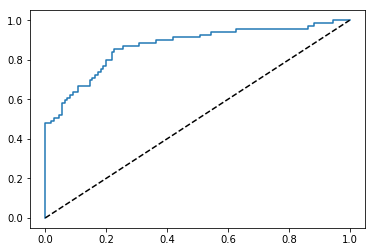

In [0]:
print('임계값 간격', thr_idx)
print('샘플용 임계값', np.round(thresholds[thr_idx], 2)) # thr_idx 임의로 14개
# 총 14개의 임계값 인덱스 출력
# [1.96 0.71 0.65 0.62 0.57 0.47 0.44 
#  0.39 0.28 0.19 0.16 0.14 0.11 0.08]

print('샘플용 임계값별 FPR', np.round(fprs[thr_idx], 3)) # thr_idx 임의로 14개
print('샘플용 임계값별 TPR', np.round(tprs[thr_idx], 3)) # thr_idx 임의로 14개
# 총 14개의 특이도와 민감도를 출력


# ROC 그래프 그림
plt.plot(fprs, tprs, label='ROC') # label  뭐꼬?
# plt.plot([0,10], [0,10], 'k--', label='Random') # 앞에 bracket묶음 2개는 각 x값, y값 범위 <- 이 범위로 하면 잘 안 보임
plt.plot([0,1], [0,1], 'k--', label='Random') # 앞에 bracket묶음 2개는 각 x값, y값 범위
plt.show()

In [0]:
## AUC (Area Under Curve)

# ROC 곡선 밑의 면적을 구한 값
# 1에 가까울 수록 좋은 수치를 의미함
# 0.9 ~   1 : excellent
# 0.8 ~ 0.9 : good
# 0.7 ~ 0.8 : normal


from sklearn.metrics import roc_auc_score


pred = lg_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 점수', roc_score)

print(lg_clf.predict(X_test[:5])) # 이산형 수치
print('---------------------------------')
print(lg_clf.predict_proba(X_test[:5])) # 확률 수치

ROC AUC 점수 0.7777997364953887
[0 0 0 1 1]
---------------------------------
[[0.85157347 0.14842653]
 [0.87164664 0.12835336]
 [0.9239038  0.0760962 ]
 [0.08235587 0.91764413]
 [0.35114951 0.64885049]]
